## Example Usage for the utilities in audio_utils

Date: 11/04/2021

In [2]:
%matplotlib inline
from IPython.display import display, Audio, HTML   
import numpy as np
import matplotlib.pyplot as plt

import librosa
try:
  import google.colab
  IN_COLAB = True
  ! pip install git+https://github.com/compi1234/AuditoryDemonstrations.git
except:
  IN_COLAB = False

import utils.audio_utils as audio

## 1. Read from file

In [3]:
help(audio.load)

Help on function load in module audio_utils:

load(resource, sample_rate=None, **kwargs)
    load() is a tiny wrapper around soundfile.read() to accomodate for
    both url and filename arguments
    
    Parameters:
    -----------
        resource : string          
            url or file name
        sample_rate : int (optional)
            if given, resample to the target sampling rate
        **kwargs 
            extra parameters to be passed to librosa
            mono(boolean), sr(resampling rate)
            
    Returns:
    --------
        wavdata : float-32 array, shape (n_samples, ) for mono or (n_channels, n_samples)
            the waveform data are scaled to [-1., 1.]
        sample_rate : int
            sampling rate of returned signal



(12880,) 8000


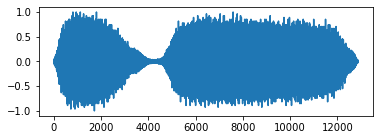

In [4]:
wavname = 'https://homes.esat.kuleuven.be/~spchlab/data/13dB/psnger.wav'
wavname = 'train.wav'
# data, samplerate = sf.read(wavname,dtype='float32')
# the normal call load()  overwrites the soundfile default of always_2d and returns a 2D array
wavdata,sample_rate= audio.load(wavname)
# but you can overwrite the load() default back to the soundfile default by
# wavdata,samplerate= audio.load(wavname,always_2d=False)
print(wavdata.shape, sample_rate)
fig = plt.figure(figsize=(6,2))
plt.plot(wavdata)
# if you want the plot above the audio widget, add line below
# plt.show()
# The Audio object takes only 1D series data, so you need to flatten the inherently 1D data 
#Audio(data=wavdata.flatten(),rate=sample_rate,autoplay=False)
# or select a channel, but this only works if the data was 2D originally
Audio(data=wavdata,rate=sample_rate,autoplay=False)

(449874,) 16000


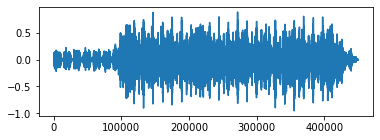

In [9]:
# you can also read from url
wavname = 'https://homes.esat.kuleuven.be/~spchlab/data/13dB/Psnger22.wav'
# and can specify a new sampling rate when reading in the data or convert multi to mono
wavdata,sample_rate= audio.load(wavname,sample_rate=16000)
print(wavdata.shape, sample_rate)
fig = plt.figure(figsize=(6,2))
plt.plot(wavdata)
Audio(data=wavdata,rate=sample_rate,autoplay=False)

## 2. Record from device

In [ ]:
help(audio.record)

In [ ]:
# you can set sampling rate and number of channels to be recorded
sample_rate=16000
wavdata = audio.record(2.,sample_rate,n_channels=2)
print(wavdata.shape)
Audio(data=wavdata,rate=sample_rate)

## 3. Multichannel plot and play

In [ ]:
audio.plot_waveform(wavdata,sample_rate)

In [ ]:
# just play the (stereo) waveform
# if you want multiple sequential plays, then you must wait for each of them to finish
# before starting the next one
audio.play(wavdata,wait=True)
# select a channel from a 
audio.play(wavdata,channels=[0])
# or render an display object
audio.play(wavdata,io_device='browser')